**Parte 1: Machine Learning**

**Fuente de Datos**

[Predicting Student Scores (Sklearn)](https://www.kaggle.com/code/jaisinghbhandari/predicting-student-scores-sklearn/notebook)


[MetaData (Sklearn)](https://www.kaggle.com/datasets/kwadwoofosu/predict-test-scores-of-students?resource=download)


**1. Librerias y Data Set**

In [2]:
#Data Structure libraries
import numpy as np
import pandas as pd

#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

from google.colab import files
uploaded = files.upload()  # Esto abrirá un cuadro para cargar el archivo
dataset = pd.read_csv("test_scores.xls")

dataset.head()


Saving test_scores.xls to test_scores.xls


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0



**Características de entrada:**
1. school: Identificador de la escuela a la que asiste el estudiante.
2.   school_setting: Entorno de la escuela (urbano, suburbano, rural).
3.   school_type: Tipo de escuela (charter, público).
4.  classroom: Identificador del aula.
5. teaching_method: Método de enseñanza utilizado (experimental, estándar).
6. n_student: Número de estudiantes en el aula.
7. student_id: Identificador único del estudiante.
8. gender: Género del estudiante (masculino, femenino).
9. lunch: Tipo de almuerzo que recibe el estudiante (gratuito/reducido, estándar).
10. pretest: Puntaje obtenido por el estudiante en una prueba previa a la intervención educativa.

**Salida**

**posttest**: Puntaje obtenido por el estudiante en una prueba posterior a la intervención educativa.



**Codificación de las características:**

*   **Variables categóricas:** Características como `school`, `school_setting`, `school_type`, `classroom`, `teaching_method`, `gender` y `lunch` son categóricas y generalmente se codifican utilizando técnicas como One-Hot Encoding para ser utilizadas en modelos de machine learning.
*   Variables numéricas: Características como `n_student`, `student_id`, `pretest` y `posttest` son numéricas y pueden utilizarse directamente en los modelos o ser normalizadas según sea necesario.











**2. Estadísticas del Data Set**

In [3]:
dataset.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


**3. Procesamiento del Data Set**

In [4]:
#Separating the parameters and the result column names
columns = dataset.columns.values.tolist()
columns.remove('posttest')
columns

#Separating the parameters and the result values
X = dataset[columns]
y = dataset['posttest']

#Encoding the categorical data in the dataset
x = pd.get_dummies(X)
x.head()

,n_student,pretest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,school_GOKXL,...,student_id_ZUFG3,student_id_ZVCQ8,student_id_ZVM0Q,student_id_ZX8TB,student_id_ZY9X3,student_id_ZZGRB,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,20.0,66.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,20.0,64.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,20.0,61.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,20.0,64.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


**4. División de Datos para Entrenamiento y Testeo**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

**5. Entrenamiento utilizando Regresión lineal de multiples variables**

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Making predictions using our model
y_pred = regressor.predict(X_test)
y_pred = np.round(y_pred)

**6. Evaluando los Resultados**

We compare the actual and predicted values using various plots and metrics to evaluate the predictions

In [7]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head()
result.insert(2, "Percent Difference",(abs((result['Predicted']-result['Actual'])*100/result['Actual'])).round(), True)
result.head()

,Actual,Predicted,Percent Difference
1628,89.0,84.0,6.0
693,57.0,54.0,5.0
812,47.0,49.0,4.0
1987,77.0,74.0,4.0
111,78.0,81.0,4.0


**Parte 2: Test Estadístico**

Vamos a realizar dos pruebas estadísticas usando el **paired t-test**:



1.   Comparar la media de las calificaciones del pretest con la media del posttest (valores reales).
2.   Comparar la media del pretest con la media de los valores predecidos del posttest (`y_pred`).



**Codigo Base:** En este apartado, se realizará un análisis estadístico para comparar las medias del pretest y posttest del conjunto real de datos utilizando el método Paired t-test.


In [8]:
from scipy.stats import ttest_rel
import numpy as np

# Cálculo de la media del pretest y posttest (valores reales)
pretest_mean = X_test['pretest'].mean()
posttest_mean = y_test.mean()

# Paired t-test entre pretest y posttest # verificar las opciones de ttest_rel (e.g., una cola, dos colas, etc)
t_statistic, p_value = ttest_rel(X_test['pretest'],y_test)

print("=== Paired t-test: Pretest vs Posttest ===")
print(f"Pretest Mean: {pretest_mean}")
print(f"Posttest Mean: {posttest_mean}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}\n")


=== Paired t-test: Pretest vs Posttest ===
Pretest Mean: 55.30149812734082
Posttest Mean: 67.29213483146067
T-statistic: -65.49771047867007
P-value: 4.3018090509011756e-257



**Actividad 1:** Mejora el `código base` anterior que comparar la media de las calificaciones del pretest con la media del posttest (valores reales). Para esto deberás incluir lo siguiente:

**1. Definición de hipótesis:**

Incluye comentarios que definan explícitamente las hipótesis: H0 y H1.

**2. Agregar una comparación del p-value con un nivel de significancia (alpha):**

Introduce una variable alpha = 0.05 como nivel de significancia. Recuerda que:
Si `p_value < alpha:` Se rechaza la hipótesis nula.
Si `p_value >= alpha:` No se rechaza la hipótesis nula.

**3. Presentar los resultados:**

Imprimir los siguientes resultados:


1.   Las medias del pretest y posttest.
2.   El valor del estadístico t.
3. El p-value.
4. La decisión final: si se rechaza o no la hipótesis nula.





In [34]:
from scipy.stats import ttest_rel
import numpy as np

# Definir las hipótesis aqui:
# Hipótesis Nula (H0): El puntaje del estudiante en una prueba posterior a la intervención educativa es la misma que el puntaje inicial.
# Hipótesis Alternativa (H1): El puntaje del estudiante en una prueba posterior a la intervención educativa es diferente al puntaje inicial.

# Cálculo de la media del pretest  posttest (valores real)
pretest_mean = X_test['pretest'].mean()
# Cálculo de la media del posttest (valor real)
posttest_mean = y_test.mean()  # y_test contiene los valores reales de posttest

# Paired t-test entre pretest y posttest
t_statistic_pre_greater_post, p_valuec_pre_greater_post = ttest_rel(X_test['pretest'], y_test, alternative='greater') #Doble cola por default  # consultar para hacer doble cola o single cola

# Incluir el valor del Nivel de significancia correspondiente
alpha=0.05   #ingresar el valor aqui

# Imprimir los Resultados
print("=== Paired t-test: Pretest vs Posttest ===")
print(f"")
print("")
print("=== === Análisis considerando cola por la derecha === ===")
print("Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.")
print("Hipótesis Alternativa (H1): Las medias del posttest reales son menor a las medias del pretest reales.\n")
print(f"Pretest Mean: {pretest_mean}")
print(f"Posttest Mean: {posttest_mean}")
print(f"T-statistic: {t_statistic_pre_greater_post}")
print(f"P-value: {p_valuec_pre_greater_post}")

# Decisión
# ingresar el código aquí es un if - else, Hint: ver el codigo visto en clases HypothesisTesting para saber la programación
# insertar el codigo aqui
print(f"")
if p_value < alpha:
    print("(✓) Puedo rechazar la hipótesis nula, lo que implica que los datos NO son consistentes con esta hipótesis y que pasa a activarse la hipótesis alternativa")
else:
    print("(x) No puedo rechazar la hipótesis nula, ya que los datos son más consistentes con esta hipótesis")


print(f"")
print(f"")
print("=== === Análisis considerando cola izquierda === ===")
print("Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.")
print("Hipótesis Alternativa (H1): Las medias del pretest reales son menor a las medias del posttest reales.\n")

t_statistic_pre_less_post, p_value_pre_less_post = ttest_rel(X_test['pretest'], y_test, alternative='less')   # consultar para hacer doble cola o single cola

print(f"Pretest Mean: {pretest_mean}")
print(f"Posttest Mean: {posttest_mean}")
print(f"T-statistic: {t_statistic_pre_less_post}")
print(f"P-value: {p_value_pre_less_post}")
print(f"")

# Decisión
# ingresar el código aquí es un if - else, Hint: ver el codigo visto en clases HypothesisTesting para saber la programación
# insertar el codigo aqui
if p_value_pre_less_post < alpha:
    print("(✓) Puedo rechazar la hipótesis nula lo que implica que los datos NO son consistentes con esta hipótesis y que pasa a activarse la hipótesis alternativa")
else:
    print("(x) No puedo rechazar la hipótesis nula, ya que los datos son más consistentes con esta hipótesis")


=== Paired t-test: Pretest vs Posttest ===


=== === Análisis considerando cola por la derecha === ===
Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.
Hipótesis Alternativa (H1): Las medias del posttest reales son menor a las medias del pretest reales.

Pretest Mean: 55.30149812734082
Posttest Mean: 67.29213483146067
T-statistic: -65.49771047867007
P-value: 1.0

(x) No puedo rechazar la hipótesis nula, ya que los datos son más consistentes con esta hipótesis


=== === Análisis considerando cola izquierda === ===
Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.
Hipótesis Alternativa (H1): Las medias del pretest reales son menor a las medias del posttest reales.

Pretest Mean: 55.30149812734082
Posttest Mean: 67.29213483146067
T-statistic: -65.49771047867007
P-value: 2.1509045254505878e-257

(✓) Puedo rechazar la hipótesis nula lo que implica que los datos NO son consistentes con esta hipótesis y q

Como se puede observar al graficar los datos de los resultados en azul de las calificaciones antes de la intervención,

y los datos reales en rojo después de la intervención podemos ver que sí hubo una mejora en las califcaciones.



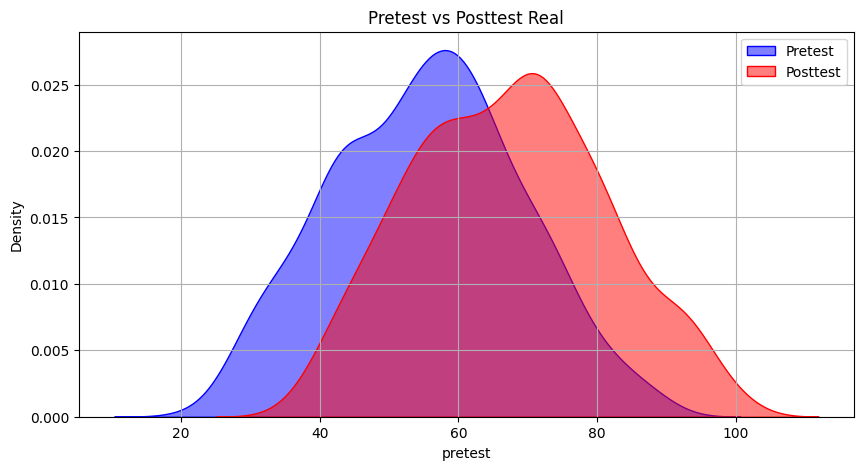

In [35]:
import seaborn as sns

print("Como se puede observar al graficar los datos de los resultados en azul de las calificaciones antes de la intervención,\n")
print("y los datos reales en rojo después de la intervención podemos ver que sí hubo una mejora en las califcaciones.\n")

plt.figure(1, figsize=(10, 5))

sns.kdeplot(X_test['pretest'], label='Pretest', fill=True, color='blue', alpha=0.5)
sns.kdeplot(y_test, label='Posttest', fill=True, color='red', alpha=0.5)

#plt.plot(p_value, y_pred)
plt.title("Pretest vs Posttest Real")
plt.legend()
plt.grid()
plt.show()

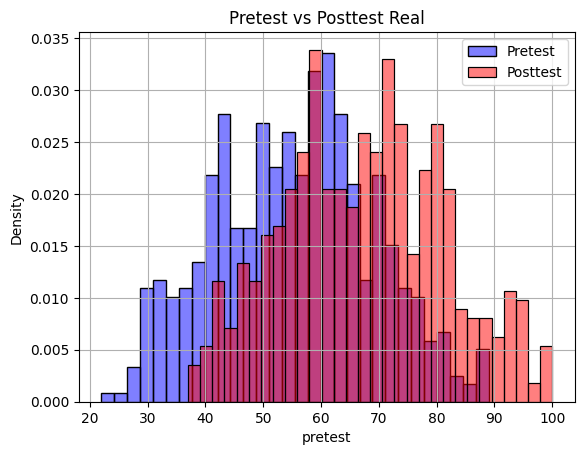

In [36]:
sns.histplot(X_test['pretest'], kde=False, stat="density", bins=30, label="Pretest", color="blue" , alpha=0.5, edgecolor='black')
sns.histplot(y_test, kde=False, stat="density", bins=30, alpha=0.5, label='Posttest', color='red', edgecolor='black')
plt.title("Pretest vs Posttest Real")
plt.legend()
plt.grid()
plt.show()

**Actividad 2:** Utilice exactamente el mismo código de la **Actividad 1** para
comparar la media del `pretest` con la media de los valores predecidos del posttest (`y_pred`).


In [44]:
from scipy.stats import ttest_rel
import numpy as np

# Definir las hipótesis aqui:
# Hipótesis Nula (H0): El puntaje del estudiante en una prueba posterior a la intervención educativa es la misma que el puntaje inicial.
# Hipótesis Alternativa (H1): El puntaje del estudiante en una prueba posterior a la intervención educativa es diferente al puntaje inicial.

# Cálculo de la media del pretest y posttest (valores reales)
pretest_mean = X_test['pretest'].mean()
# Cálculo de la media del posttest (valor real)
predicted_posttest_mean = y_pred.mean()     #inserte su linea de codigo aqui

# Paired t-test entre pretest y posttest
t_statistic_pre_greater_post_pred, p_value_pre_greater_post_pred = ttest_rel(X_test['pretest'], y_pred, alternative='greater')   # consultar para hacer doble cola o single cola

# Incluir el valor del Nivel de significancia correspondiente
alpha=0.05    #ingresar el valor aqui

# Imprimir los Resultados
print("=== Paired t-test: Pretest vs Posttest Predecidos ===")
print("")
print("=== === Análisis considerando cola por la derecha === ===")
print("Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.")
print("Hipótesis Alternativa (H1): Las medias del posttest predecidos son menores a las medias del pretest real.\n")
print(f"Pretest Mean: {pretest_mean}")
print(f"Posttest Mean: {predicted_posttest_mean}")
print(f"T-statistic: {t_statistic_pre_greater_post_pred}")
print(f"P-value: {p_value_pre_greater_post_pred}")


print(f"")
# Decisión
# ingresar el código aquí es un if - else, Hint: ver el codigo visto en clases HypothesisTesting para saber la programación
# insertar el codigo aqui
if p_value < alpha:
    print("(✓) Puedo rechazar la hipótesis nula, lo que implica que los datos NO son consistentes con esta hipótesis y que pasa a considerarse la hipótesis alternativa como válida")
else:
    print("(x) No puedo rechazar la hipótesis nula, ya que los datos son más consistentes con esta hipótesis")

print(f"")
print(f"")
print("=== === Análisis considerando cola por la izquierda === ===")
print("Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest predecidos.")
print("Hipótesis Alternativa (H1): Las medias del pretest reales son menor a las medias del posttest predeciddas.\n")

t_statistic_pre_less_post_pred, p_value_pre_less_post_pred = ttest_rel(X_test['pretest'], y_pred, alternative='less')   # consultar para hacer doble cola o single cola

print(f"T-statistic de una cola por la derecha: {t_statistic_pre_less_post_pred}")
print(f"P-value de una cola por la derecha: {p_value_pre_less_post_pred}")
print(f"")
# Decisión
# ingresar el código aquí es un if - else, Hint: ver el codigo visto en clases HypothesisTesting para saber la programación
# insertar el codigo aqui
if p_value_pre_less_post < alpha:
    print("(✓) Puedo rechazar la hipótesis nula, lo que implica que los datos NO son consistentes con esta hipótesis y que pasa a considerarse la hipótesis alternativa como válida")
else:
    print("(x) No puedo rechazar la hipótesis nula, ya que los datos son más consistentes con esta hipótesis")


=== Paired t-test: Pretest vs Posttest Predecidos ===

=== === Análisis considerando cola por la derecha === ===
Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest.
Hipótesis Alternativa (H1): Las medias del posttest predecidos son menores a las medias del pretest real.

Pretest Mean: 55.30149812734082
Posttest Mean: 67.43632958801498
T-statistic: -87.27626644470875
P-value: 1.0

(x) No puedo rechazar la hipótesis nula, ya que los datos son más consistentes con esta hipótesis


=== === Análisis considerando cola por la izquierda === ===
Hipótesis Nula (H0): No hay diferencia significativa entre las medias del pretest y posttest predecidos.
Hipótesis Alternativa (H1): Las medias del pretest reales son menor a las medias del posttest predeciddas.

T-statistic de una cola por la derecha: -87.27626644470875
P-value de una cola por la derecha: 3.97363e-318

(✓) Puedo rechazar la hipótesis nula, lo que implica que los datos NO son consistentes con es

Como se puede observar al graficar los datos de los resultados en azul de las calificaciones antes de la intervención,

y los datos predecidos en rojo después de la intervención podemos ver que sí hubo una mejora en las califcaciones.



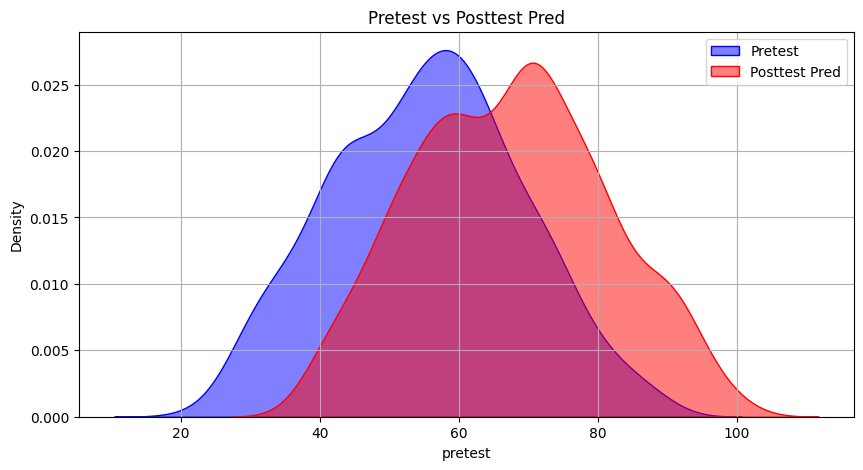

In [45]:
print("Como se puede observar al graficar los datos de los resultados en azul de las calificaciones antes de la intervención,\n")
print("y los datos predecidos en rojo después de la intervención podemos ver que sí hubo una mejora en las califcaciones.\n")

plt.figure(1, figsize=(10, 5))

sns.kdeplot(X_test['pretest'], label='Pretest', fill=True, color='blue', alpha=0.5)
sns.kdeplot(y_pred, label='Posttest Pred', fill=True, color='red', alpha=0.5)

#plt.plot(p_value, y_pred)
plt.title("Pretest vs Posttest Pred")
plt.legend()
plt.grid()
plt.show()

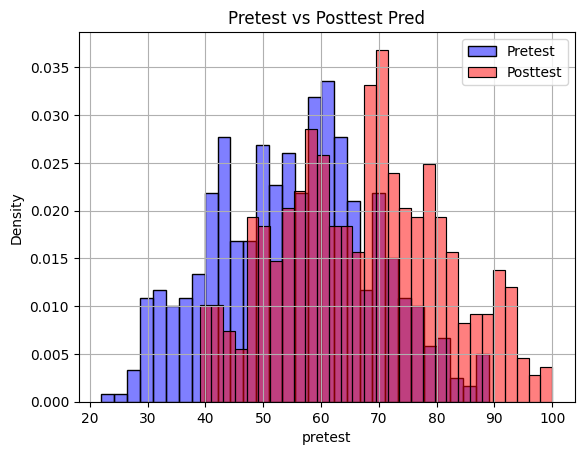

In [46]:
sns.histplot(X_test['pretest'], kde=False, stat="density", bins=30, label="Pretest", color="blue" , alpha=0.5, edgecolor='black')
sns.histplot(y_pred, kde=False, stat="density", bins=30, alpha=0.5, label='Posttest', color='red', edgecolor='black')
plt.title("Pretest vs Posttest Pred")
plt.legend()
plt.grid()
plt.show()

**Parte 3: Kolmogorov-Smirnov KS Test: Goodness-of-fit**

**Actividad 3:** Anarlizar un conjunto de datos desconocidos (generados a partir de una distribución específica) y utilizar el Test de Kolmogorov-Smirnov (KS) para determinar la distribución de probabilidad que más se ajuste a los datos

**Cargamos la libreria para el test no estadístico KS**

In [48]:
!pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.7 MB/s eta 0:00:00


**Código a Completar**  (Investigar las distintas distribuciones y descubra como se modelan los datos  )

Saving samples.csv to samples.csv
=== Parámetros de las distribuciones ajustadas ===
norm: (0.9478521830261226, 0.30719151186851557)
uniform: (0.0921909623342274, 2.3095749411322606)
beta: (8.364287730053336, 26.6018858197383, -0.08559790845242558, 4.320207752976614)
expon: (0.0921909623342274, 0.8556612206918952)
gamma: (20.290699383939952, -0.43870768836472673, 0.06833475274932208)
lognorm: (0.14631129975567167, -1.14443131692464, 2.0700263114906297)
nakagami: (2.3342518031773114, 0.0319040113535191, 0.9660910368212519)
chi2: (40.58149031640038, -0.43870903484905, 0.03416733106227421)
triang: (0.28978470199877393, 0.09137835627999663, 2.311056118439523)
cauchy: (0.9226957325775703, 0.1892757671406801)

=== Resultados del test de Kolmogorov-Smirnov (KS) ===
norm: KS-statistic = 0.02855575089300394, p-value = 0.0005635134918552056
uniform: KS-statistic = 0.35508728467272643, p-value = 0.0
beta: KS-statistic = 0.011321065760144133, p-value = 0.5394883531502803
expon: KS-statistic = 0.32

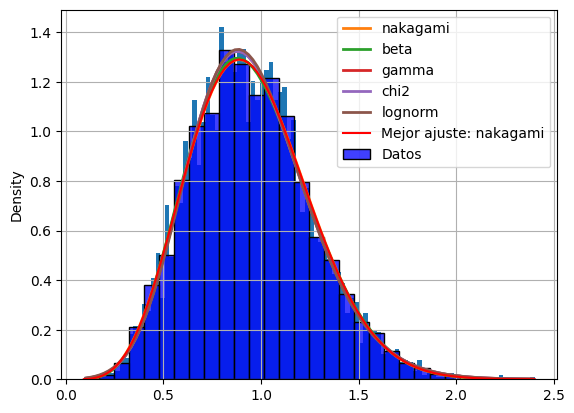

In [49]:
import numpy as np
from fitter import Fitter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import kstest, norm, expon, uniform, gamma, beta, lognorm, nakagami, chi2, triang, cauchy
from google.colab import files

# Subir el archivo de muestras desconocidas
uploaded = files.upload()

# Cargar las muestras subidas
uploaded_file = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
data_uploaded = pd.read_csv(uploaded_file)["Samples"].values

# Lista de distribuciones AQUI SE TIENE QUE INVESTIGAR OTROS TIPOS DE DISTRIBUCIONES continuas PARA VER EL MEJOR AJUSTE, ACTUALMENTE ESTAN SOLO DOS, por lo menos colocar 4 distribuciones mas
distributions = ["norm", "uniform","beta", "expon", "gamma", "lognorm", "nakagami", "chi2", "triang", "cauchy"]

# Crear un diccionario dinámico para mapear nombres a funciones de scipy.stats
scipy_distributions = {name: eval(name) for name in distributions}

# Inicializar el Fitter con las distribuciones
f = Fitter(data_uploaded, distributions=distributions)

# Ajustar los datos a las distribuciones
f.fit()

# Mostrar todas las distribuciones ajustadas con sus parámetros
print("=== Parámetros de las distribuciones ajustadas ===")
for dist_name, params in f.fitted_param.items():
    print(f"{dist_name}: {params}")

# Realizar el test KS para cada distribución ajustada
ks_results = {}
for dist_name, params in f.fitted_param.items():
    dist = scipy_distributions[dist_name]  # Obtener la distribución de scipy.stats
    cdf = lambda x: dist.cdf(x, *params)  # CDF de la distribución ajustada
    ks_statistic, p_value = kstest(data_uploaded, cdf)
    ks_results[dist_name] = (ks_statistic, p_value)

# Mostrar resultados del test KS
print("\n=== Resultados del test de Kolmogorov-Smirnov (KS) ===")
for dist_name, (ks_statistic, p_value) in ks_results.items():
    print(f"{dist_name}: KS-statistic = {ks_statistic}, p-value = {p_value}")

# Seleccionar la mejor distribución basada en el menor KS-statistic
best_fit = min(ks_results, key=lambda k: ks_results[k][0])

# Resultados del mejor ajuste
print("\n=== Mejor distribución ajustada según KS ===")
print(f"{best_fit}: KS-statistic = {ks_results[best_fit][0]}, p-value = {ks_results[best_fit][1]}")

# Resumen del ajuste con visualización
f.summary()

# Visualización del histograma de los datos
sns.histplot(data_uploaded, kde=False, stat="density", bins=30, label="Datos", color="blue")

# Graficar la mejor distribución ajustada (PDF)
best_params = f.fitted_param[best_fit]
best_dist = scipy_distributions[best_fit]

x = np.linspace(min(data_uploaded), max(data_uploaded), 100)
plt.plot(
    x,
    best_dist.pdf(x, *best_params),
    label=f"Mejor ajuste: {best_fit}",
    color="red"
)
plt.legend()
plt.show()


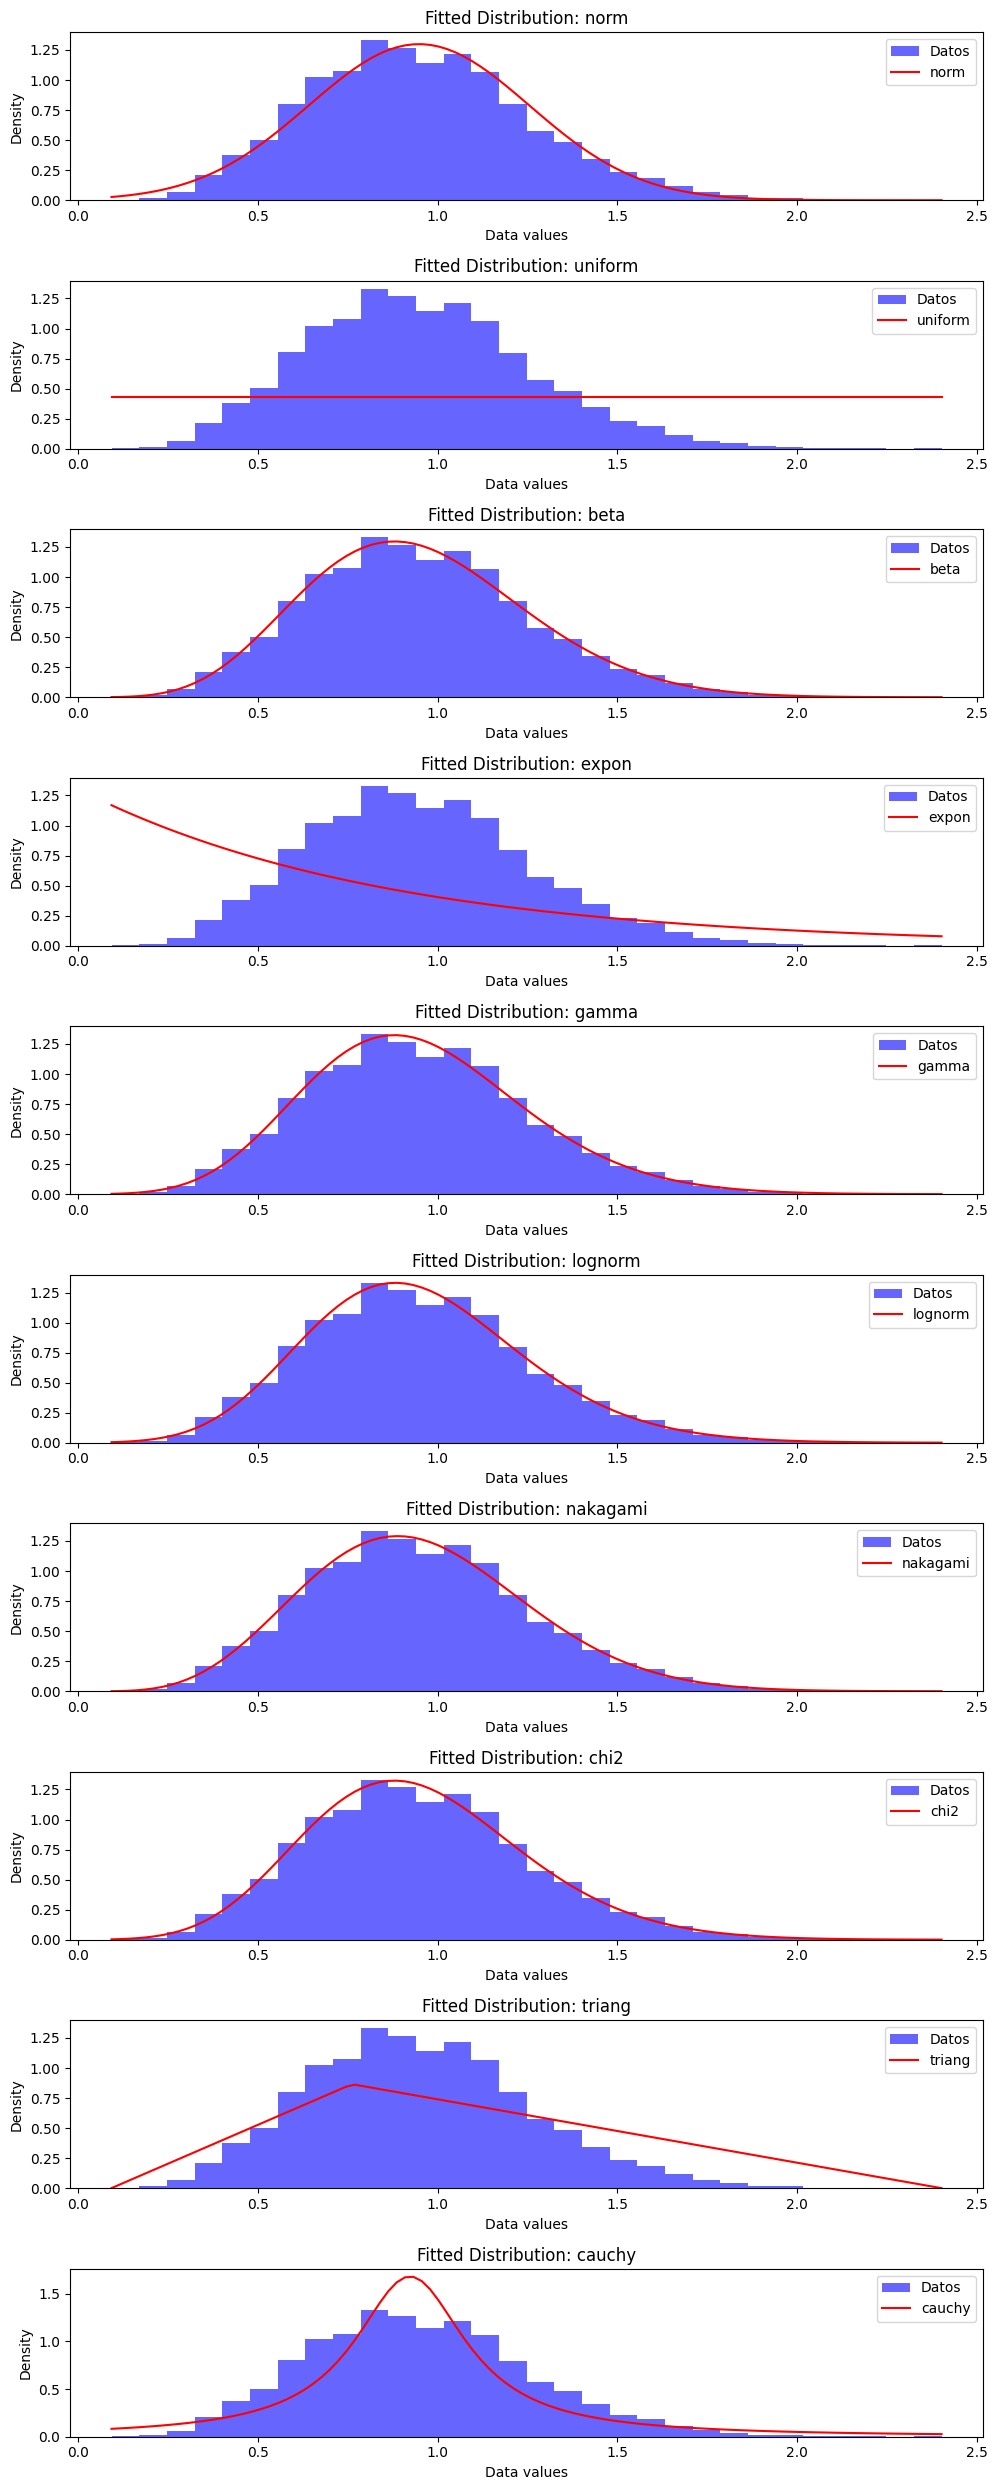

In [50]:
fig, axes = plt.subplots(len(distributions), 1, figsize=(10, 25))

# Plot each fitted distribution on a separate plot
for i, (dist_name, params) in enumerate(f.fitted_param.items()):
    ax = axes[i]  # Select the current subplot

    ax.hist(data_uploaded, bins=30, density=True, alpha=0.6, color='blue', label='Datos')

    # Generate the fitted distribution
    dist = scipy_distributions[dist_name]
    x = np.linspace(min(data_uploaded), max(data_uploaded), 100)
    pdf = dist.pdf(x, *params)  # PDF of the fitted distribution

    # Plot the fitted distribution
    ax.plot(x, pdf, label=dist_name, color='red')

    # Set the title and labels
    ax.set_title(f"Fitted Distribution: {dist_name}")
    ax.set_xlabel("Data values")
    ax.set_ylabel("Density")

    # Add legend
    ax.legend()

# Display the plots
plt.tight_layout()
plt.show()


Conclusión:

Para la actividad 3, la función de distribución de probabilidad que mejor se acercó a los datos es Nakagami de acuerdo a lo indicado al revisar el valor KS-statistic que para esta función de distribución es el menor (0.009602519089375372)

La familia de distribución Nakagami tiene 2 parámetros:
* shape parameter: m ≥ 1/2
* scale parameter Ω > 0

Esta función se usa para modelar fenómenos físicos tales como imágenes de ultrasonido en medicina, comunicaciones, meteorología, hidrología, multimedia y sismología.